In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.metrics import classification_report

In [158]:
df = pd.read_table('smsspamcollection.tsv')
df.head()

,label,body_text,body_text_nostop
0,ham,I've been searching for the right words to tha...,"['ive', 'searching', 'right', 'words', 'thank'..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"['free', 'entry', '2', 'wkly', 'comp', 'win', ..."
2,ham,"Nah I don't think he goes to usf, he lives aro...","['nah', 'dont', 'think', 'goes', 'usf', 'lives..."
3,ham,Even my brother is not like to speak with me. ...,"['even', 'brother', 'like', 'speak', 'treat', ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"['date', 'sunday']"


In [159]:
df.drop('body_text_nostop',axis = 1,inplace = True)

In [160]:
df.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5568 non-null   object
 1   body_text  5568 non-null   object
dtypes: object(2)
memory usage: 87.1+ KB


In [162]:
df.size

11136

In [163]:
df.shape

(5568, 2)

In [164]:
df.isnull().sum()

label        0
body_text    0
dtype: int64

In [165]:
df['label'].value_counts()

label
ham     4822
spam     746
Name: count, dtype: int64

In [166]:
df[df['label'] == 'spam']['body_text']

1       Free entry in 2 a wkly comp to win FA Cup fina...
6       WINNER!! As a valued network customer you have...
7       Had your mobile 11 months or more? U R entitle...
9       SIX chances to win CASH! From 100 to 20,000 po...
10      URGENT! You have won a 1 week FREE membership ...
                              ...                        
5533    Want explicit SEX in 30 secs? Ring 02073162414...
5536    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5543    Had your contract mobile 11 Mnths? Latest Moto...
5562    REMINDER FROM O2: To get 2.50 pounds free call...
5563    This is the 2nd time we have tried 2 contact u...
Name: body_text, Length: 746, dtype: object

In [167]:
df[df['label'] == 'ham']['body_text']

0       I've been searching for the right words to tha...
2       Nah I don't think he goes to usf, he lives aro...
3       Even my brother is not like to speak with me. ...
4                     I HAVE A DATE ON SUNDAY WITH WILL!!
5       As per your request 'Melle Melle (Oru Minnamin...
                              ...                        
5561                                         Huh y lei...
5564                 Will ü b going to esplanade fr home?
5565    Pity, * was in mood for that. So...any other s...
5566    The guy did some bitching but I acted like i'd...
5567                           Rofl. Its true to its name
Name: body_text, Length: 4822, dtype: object

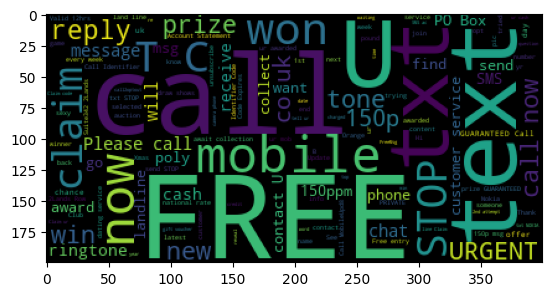

In [168]:
wd = WordCloud()
wd.generate(' '.join(df[df['label'] == 'spam']['body_text']))
plt.imshow(wd)
plt.show()

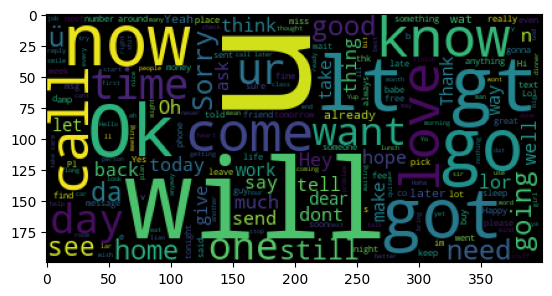

In [169]:
wd1 = WordCloud()
wd1.generate(' '.join(df[df['label'] == 'ham']['body_text']))
plt.imshow(wd1)
plt.show()

In [170]:
x = df['body_text']
y = df['label']

In [171]:
cv = CountVectorizer()
x = cv.fit_transform(x).toarray()

In [172]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.30,random_state = 1)

In [173]:
BNB = BernoulliNB()
MNB = MultinomialNB()
GNB = GaussianNB()

In [174]:
def model_build(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    print(classification_report(ytest,ypred))
    print(f'Training Score: {train}\n Testing Score: {test}')

In [175]:
model_build(BNB)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1447
        spam       0.97      0.87      0.92       224

    accuracy                           0.98      1671
   macro avg       0.98      0.93      0.95      1671
weighted avg       0.98      0.98      0.98      1671

Training Score: 0.9846035411855273
 Testing Score: 0.9790544584081389


In [176]:
model_build(MNB)

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1447
        spam       0.96      0.95      0.96       224

    accuracy                           0.99      1671
   macro avg       0.98      0.97      0.97      1671
weighted avg       0.99      0.99      0.99      1671

Training Score: 0.9933282011803952
 Testing Score: 0.988031119090365


In [177]:
model_build(GNB)

              precision    recall  f1-score   support

         ham       0.99      0.91      0.95      1447
        spam       0.61      0.92      0.74       224

    accuracy                           0.91      1671
   macro avg       0.80      0.92      0.84      1671
weighted avg       0.94      0.91      0.92      1671

Training Score: 0.9489350782653323
 Testing Score: 0.9114302812687014


In [178]:
msg = "Call Free OK"
msg1 = 'I love U'

In [179]:
def mymodel(text):
    text = cv.transform([text]).toarray()
    mnb = MultinomialNB()
    mnb.fit(xtrain,ytrain)
    yp = mnb.predict(text)
    return yp

In [180]:
mymodel(msg)

array(['ham'], dtype='<U4')

In [181]:
mymodel(msg1)

array(['ham'], dtype='<U4')